<a href="https://colab.research.google.com/github/trisskmasarahh/PCVK_Ganjil_2025/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
S

**NAMA : TRI SUKMA SARAH**

**KELAS: 3B**

**NIM : 2341720051**

# MODUL 2 PENGGUNAAAN NUMPY DAN OPENCV SERTA PENGENALAN APLIKASI PENGOLAHAN CITRA

Import folder yang ada di Drive dengan cara

In [3]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Masukkan kode program dengan file image sesuai dengan nama di drive

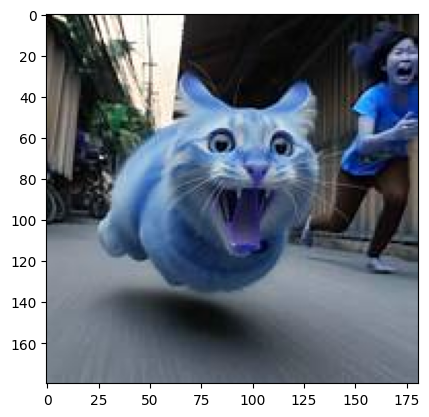

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar berwarna (BGR)
img = cv.imread('/content/drive/MyDrive/PCVK/Cat01.jpeg')
plt.imshow(img)  # perhatikan hasilnya adalah citra dengan channel warna BGR


OpenCv membaca image dan menyimpan dalam image dalam chanel warna BGR

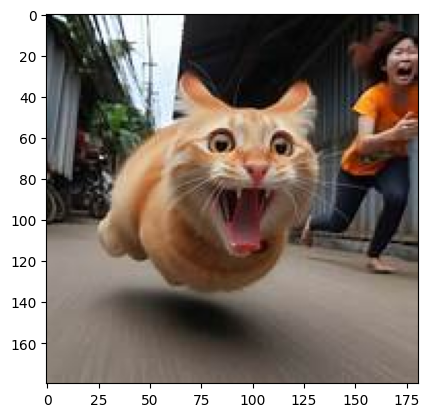

In [6]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

Menampilkan citra Grayscale, melakukan resizing, melakukan Flipping, Menyimpan citra hasil

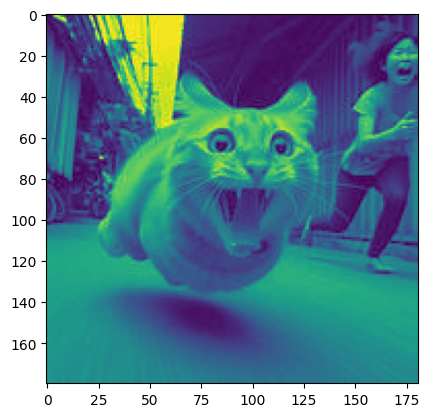

In [7]:
# Membaca gambar grayscale
img_gray = cv.imread('/content/drive/MyDrive/PCVK/Cat01.jpeg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna

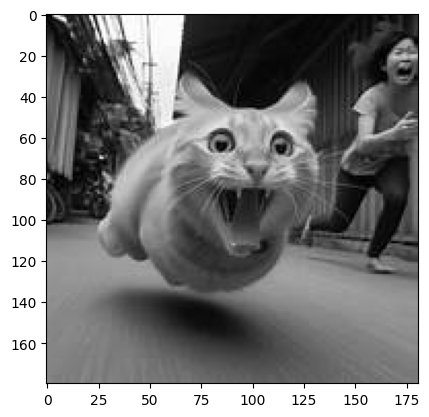

In [8]:
# Menampilkan grayscale dengan colormap lain
plt.imshow(img_gray, cmap='gray')

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna magma



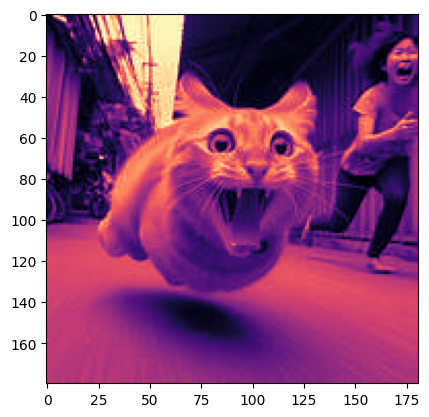

In [9]:
# Menampilkan grayscale dengan colormap lain
plt.imshow(img_gray, cmap='magma')

Citra RGB di resize dalam ukuran panjang 512 dan lebar 1024

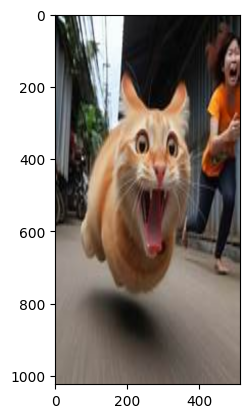

In [10]:
# Resize gambar dan konversi BGR ke RGB
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

Citra RGB ditampilkan dalam ukuran yang lebih besar dengan posisi gambar terbalik

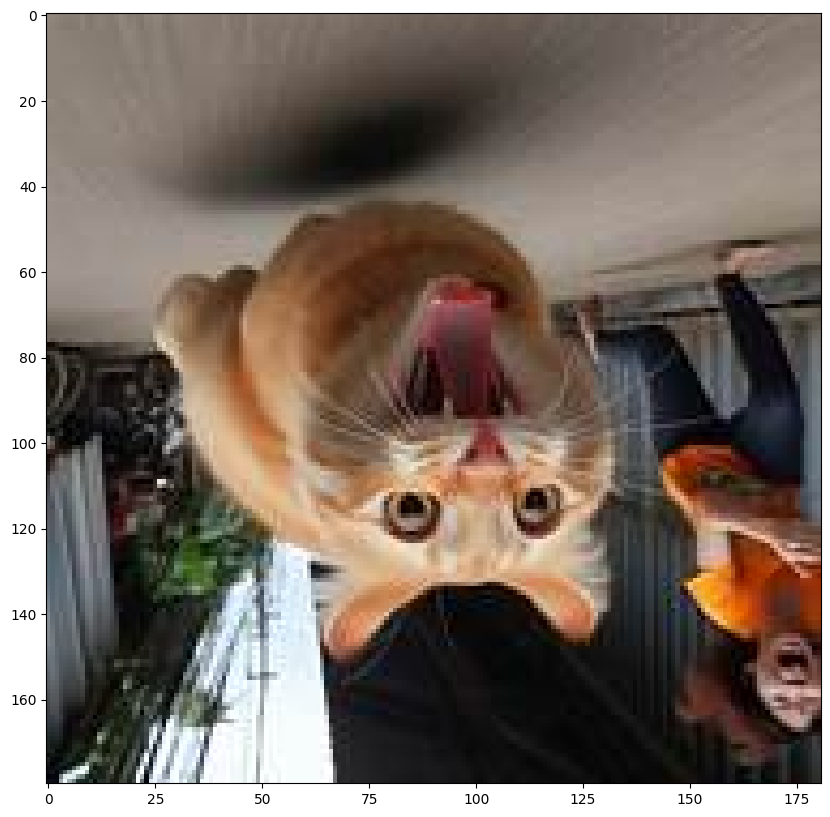

In [11]:
# Flip gambar secara vertikal (0 = vertical, 1 = horizontal, -1 = keduanya)
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

# Tampilkan dengan ukuran canvas yang lebih besar
fig = plt.figure(figsize=(10,10))  # ubah ukuran sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

Membuat bentuk Geometri 2D dari OpenCV. Diawali dengan pembuatan black image dengan tipe data int16.

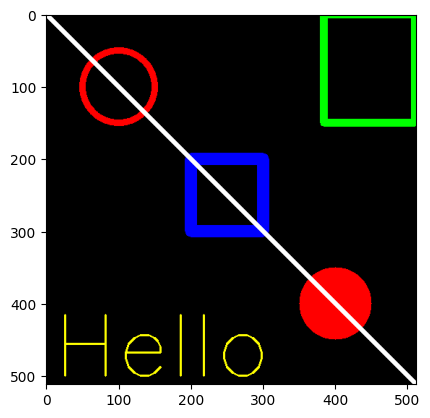

In [14]:
# Membuat gambar hitam (kosong) dengan ukuran 512x512
black_img = np.zeros(shape=(512,512,3), dtype=np.int16)
# Lingkaran merah
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)

# Persegi biru
cv.rectangle(black_img, pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=15)

# Persegi hijau
cv.rectangle(black_img, pt1=(384,0), pt2=(510,150), color=(0,255,0), thickness=10)

# Lingkaran merah
cv.circle(black_img, center=(400,400), radius=50, color=(255,0,0), thickness=-1)

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(
    black_img,
    text='Hello',
    org=(10,500),
    fontFace=font,
    fontScale=4,
    color=(255,255,0),
    thickness=2,
    lineType=cv.LINE_AA
)
cv.line(
    black_img,
    pt1=(0,0),
    pt2=(512,512),
    color=(255,255,255),
    thickness=5
)

plt.imshow(black_img)

Penambahan polyline pada black image kedua yang telah dibuat

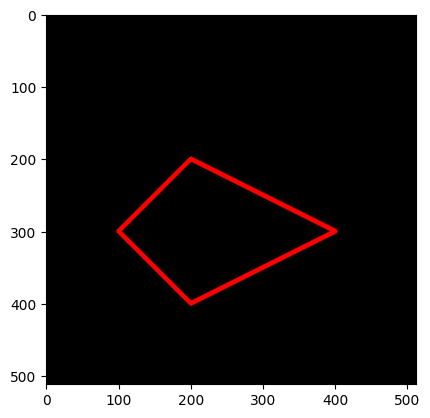

In [15]:
black_img2 = np.zeros(shape=(512,512,3), dtype=np.int32)

vertices = np.array(
    [[100,300], [200,200], [400,300], [200,400]],
    dtype=np.int32
)
vertices

pts = vertices.reshape((-1,1,2))   # nilai 2 untuk menunjukkan bahwa tiap titik dibuat 3 channel yg mewakili R, G, dan B
pts

cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)

plt.imshow(black_img2)

# PERTANYAAN

# 1.Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?

JAWAB:

Tanpa matplotlib (misalnya dengan cv2.imshow) → gambar ditampilkan menggunakan window bawaan OpenCV, warna default adalah BGR.
Dengan matplotlib (plt.imshow) → gambar ditampilkan dalam notebook/jupyter atau inline, warna default adalah RGB. Jika tidak dikonversi, warnanya bisa terlihat salah (misalnya biru jadi merah).

# 2.Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16 dan int32?

int16 → hanya bisa menyimpan nilai pixel pada rentang -32,768 s.d. 32,767. Jika nilai pixel keluar dari rentang, akan terjadi overflow/underflow sehingga warna tidak tampil sesuai harapan.
int32 → bisa menyimpan nilai pixel yang jauh lebih besar (-2 milyar s.d. 2 milyar), sehingga lebih aman terhadap operasi perhitungan. untuk citra standar (0–255), umumnya digunakan uint8. Jika memakai int16 atau int32, citra tetap hitam karena nilainya nol, tetapi saat operasi matematika (filter, brightness, dsb.) hasilnya bisa berbeda.

# 3. Apakah kegunaan from google.colab.patches import cv2_imshow pada potongan kode berikut?

from google.colab.patches import cv2_imshow
from skimage import io
cv2_imshow adalah fungsi pengganti yang memungkinkan gambar ditampilkan langsung di cell output Google Colab

# 4. Apakah kegunaan from skimage import io pada potongan kode soal nomor 3?

skimage.io menyediakan fungsi seperti io.imread() dan io.imshow().
Kegunaannya: untuk membaca, menulis, dan menampilkan gambar dengan cara yang lebih sederhana dibanding OpenCV. Contoh:

# TUGAS

1.Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga berubah?

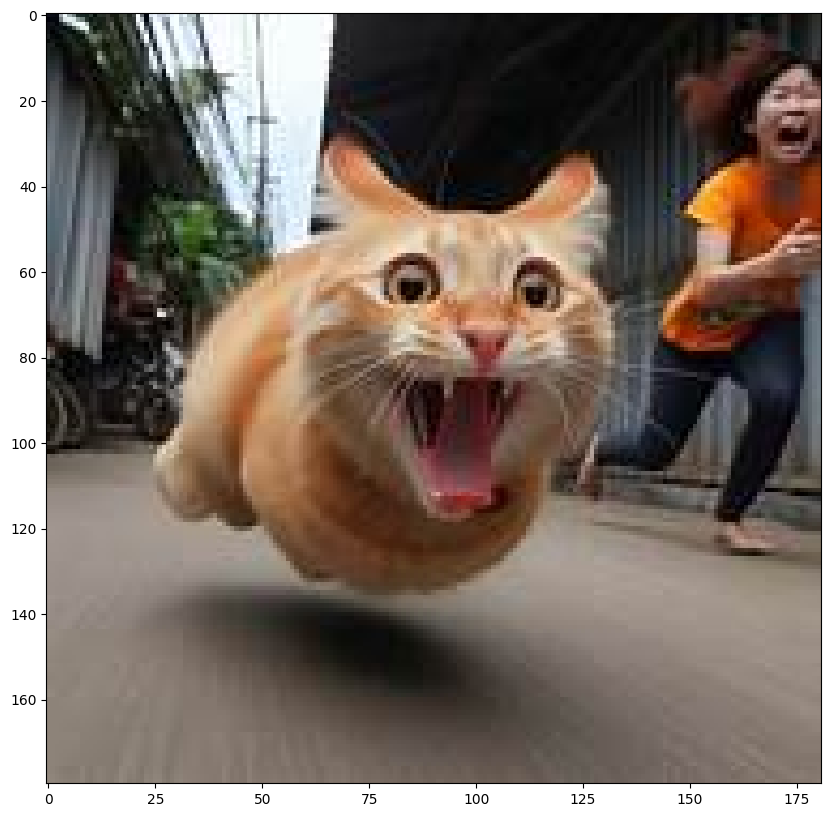

In [16]:
img6 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img6)

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

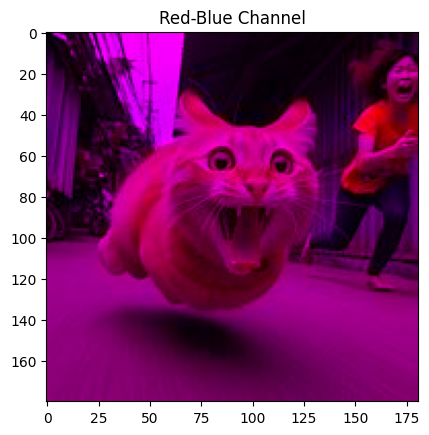

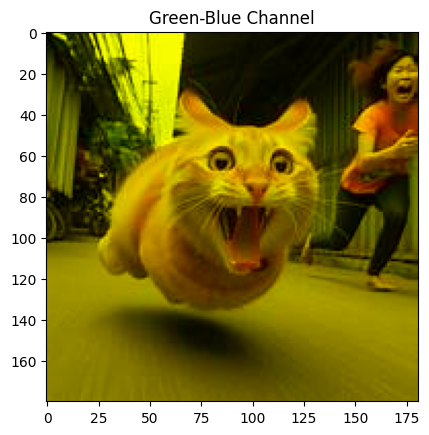

In [17]:
img_rb = img.copy()
img_rb[:, :, 1] = 0
plt.imshow(cv.cvtColor(img_rb, cv.COLOR_BGR2RGB))
plt.title('Red-Blue Channel')
plt.show()

img_gb = img.copy()
img_gb[:, :, 0] = 0
plt.imshow(cv.cvtColor(img_gb, cv.COLOR_BGR2RGB))
plt.title('Green-Blue Channel')
plt.show()


3. Tampilkan image baris ke 20-115, kolom 25-120!

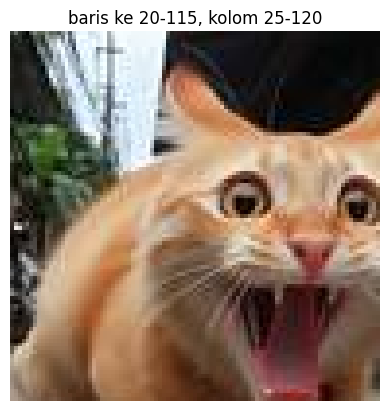

In [18]:
cropped_img = img[20:115, 25:120]
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))
plt.title('baris ke 20-115, kolom 25-120')
plt.axis('off')
plt.show()

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

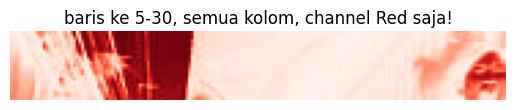

In [19]:
red_channel = img[5:30, :, 2]
plt.imshow(red_channel, cmap='Reds')
plt.title('baris ke 5-30, semua kolom, channel Red saja!')
plt.axis("off")
plt.show()

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image. disarankan menggunakan bilangan acak/random!

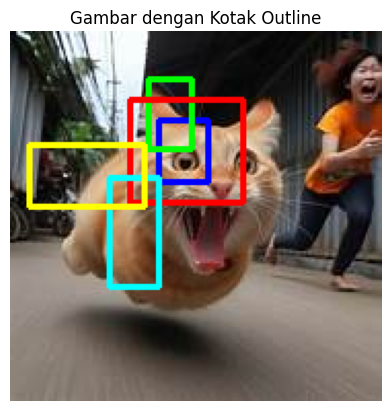

In [26]:
import random
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/Cat01.jpeg')
height, width, _ = img.shape

colors = [
    (255, 0, 0),    # Biru
    (0, 255, 0),    # Hijau
    (0, 0, 255),    # Merah
    (255, 255, 0),  # Cyan
    (0, 255, 255)   # Kuning
]

img_boxes = img.copy()

for i, color in enumerate(colors):
    # Posisi acak aman
    x1 = random.randint(0, max(0, width // 2))
    y1 = random.randint(0, max(0, height // 2))

    # Ukuran kotak lebih kecil (10% – 30% dari gambar)
    w = random.randint(width // 10, width // 3)
    h = random.randint(height // 10, height // 3)

    # Pastikan tidak keluar batas
    x2 = min(x1 + w, width - 1)
    y2 = min(y1 + h, height - 1)

    # Kotak dengan garis tipis (2px)
    cv.rectangle(img_boxes, (x1, y1), (x2, y2), color, 2)

plt.imshow(cv.cvtColor(img_boxes, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gambar dengan Kotak Outline")
plt.show()


6. Tampilkan image dengan posisi terbalik!

Text(0.5, 1.0, 'Terbalik')

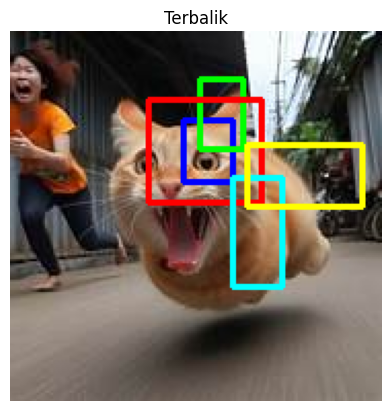

In [27]:
flipped = cv.flip(img_boxes, 1)
plt.imshow(cv.cvtColor(flipped, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Terbalik")

7. Buat rectangle dan circle pada bagian wajah dari image foto s anda saat beraktifitas (bukan pasfoto).

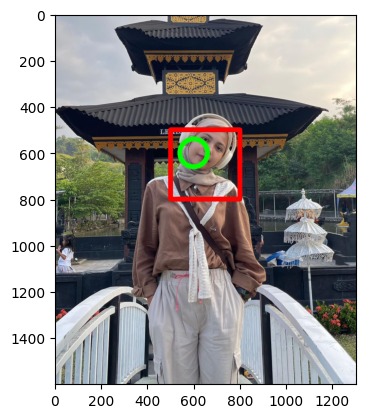

In [207]:
gambar = cv.imread('/content/drive/MyDrive/PCVK/Actvty.jpg')

cv.circle(gambar, center=(center_x, center_y), radius=60, color=(0, 255, 0), thickness=20)
center_x = 600
center_y = 600
cv.rectangle(gambar, pt1=(500, 500), pt2=(800, 800), color=(0, 0, 255), thickness=20)
gambar_rgb = cv.cvtColor(gambar, cv.COLOR_BGR2RGB)

plt.imshow(gambar_rgb)
plt.show()

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!

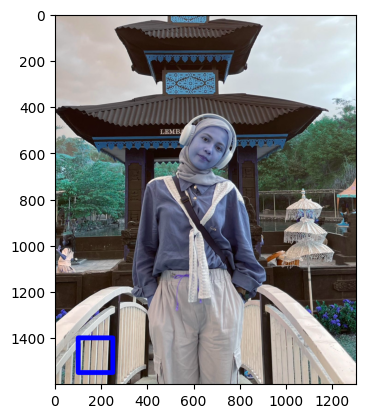

In [255]:
img = cv.imread('/content/drive/MyDrive/PCVK/Actvty.jpg')
x_b, y_b, w_b, h_b = 100, 1400, 150, 150
cv.rectangle(img, (x_b, y_b), (x_b+w_b, y_b+h_b), (0, 0, 255), 20)
plt.imshow(img)

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran font, dan warna font yang sesuai keinginan anda.

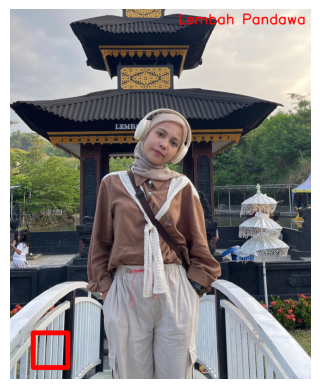

In [257]:


font = cv.FONT_HERSHEY_SIMPLEX
text = "Lembah Pandawa"

(h, w, _) = img.shape

# Dapat ukuran teks
(text_w, text_h), baseline = cv.getTextSize(text, font, 2, 3)  # font kecil

# Posisi pojok kanan atas (beri padding 20 px)
x = w - text_w - 20
y = text_h + 20

# Tambahkan teks
cv.putText(img, text, (x, y), font, 2, (0, 0, 255), 3, cv.LINE_AA)

# Tampilkan
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
